# Stock Market Clustering and Correleation Analysis
## Introducion
Financial analysts working on the analysis and research department of a domestic investment firm will use the data of the stocks in BİST-30 to segment them and give advice on how their customers should build a portfolio according to the results of these analyzes.

In this study, the data scraping method will be used to obtain data belonging to İŞ-
investment. The data that we obtained comes with the clustering method, we are going to classify by volatility and income.

Source:"https://www.isyatirim.com.tr"

# Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data processing

In [3]:
url="https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=03#page-1"
r=requests.get(url)
s=BeautifulSoup(r.text,"html.parser")
table=s.find("table",{"id":"summaryBasicData"})
#We index it to prevent it from being included in the list.
table=pd.read_html(str(table),flavor="bs4")[0]
print(table)

      Kod                   Hisse Adı                Sektör  Kapanış(TL)  \
0   AKBNK                      Akbank            Bankacılık         1655   
1   AKSEN                 Aksa Enerji              Elektrik         3910   
2   ALARK              Alarko Holding            Holdingler         7085   
3   ARCLK                     Arçelik     Dayanıklı Tüketim         9615   
4   ASELS                     Aselsan               Savunma         5525   
5   BIMAS  Bim Birleşik Mağazalar A.Ş   Perakande - Ticaret        12310   
6   EKGYO             Emlak Konut GYO                   GYO          788   
7   EREGL          Ereğli Demir Çelik     Demir-Çelik Temel         4036   
8   FROTO                 Ford Otosan              Otomotiv        47250   
9   GARAN             Garanti Bankası            Bankacılık         2416   
10  GUBRF           Gübre Fabrikaları    Tarım Kimyasalları        26610   
11  HEKTS                      Hektaş    Tarım Kimyasalları         3642   
12  ISCTR   

In [4]:
# Adding shares to the list
shares=[]
for i in table["Kod"]:
    shares.append(i)

parameter=(
   ("hisse",shares[0]),
   ("startdate","26-12-2020"),
   ("enddate","26-12-2022")) 

url2="https://www.isyatirim.com.tr/_layouts/15/Isyatirim.Website/Common/Data.aspx/HisseTekil?"
r2=requests.get(url2,params=parameter).json()["value"]


#Because it is a json dictionary structure, we write it down as a dict.
data=pd.DataFrame.from_dict(r2)
data=data.iloc[:,0:3]
data=data.rename({"HGDG_HS_KODU":"Share","HGDG_TARIH":"Date","HGDG_KAPANIS":"Price"},axis=1)

data1= {"Date":data["Date"],data["Share"][0]:data["Price"]}
data=pd.DataFrame(data1)



# We remove the zeroth index because we don't want to print it as a list.
del shares[0]
alldata=[data]


for j in shares:
    parameter=(
   ("hisse",j),
   ("startdate","26-12-2020"),
   ("enddate","26-12-2022")) 

    url2="https://www.isyatirim.com.tr/_layouts/15/Isyatirim.Website/Common/Data.aspx/HisseTekil?"
    r2=requests.get(url2,params=parameter).json()["value"]


   # Rename the columns
    data=pd.DataFrame.from_dict(r2)
    data=data.iloc[:,0:3]
    data=data.rename({"HGDG_HS_KODU":"Share","HGDG_TARIH":"Date","HGDG_KAPANIS":"Price"},axis=1)

    data1= {"Date":data["Date"],data["Share"][0]:data["Price"]}
    data=pd.DataFrame(data1)
    alldata.append(data)
    
print(alldata)


[           Date  AKBNK
0    28-12-2020  6.175
1    29-12-2020  6.251
2    30-12-2020  6.515
3    31-12-2020  6.543
4    04-01-2021  6.694
..          ...    ...
496  20-12-2022 20.000
497  21-12-2022 19.950
498  22-12-2022 19.850
499  23-12-2022 19.720
500  26-12-2022 19.920

[501 rows x 2 columns],            Date  AKSEN
0    28-12-2020  3.556
1    29-12-2020  3.610
2    30-12-2020  3.561
3    31-12-2020  3.644
4    04-01-2021  3.845
..          ...    ...
496  20-12-2022 51.150
497  21-12-2022 49.660
498  22-12-2022 48.800
499  23-12-2022 49.060
500  26-12-2022 48.240

[501 rows x 2 columns],            Date  ALARK
0    28-12-2020  8.088
1    29-12-2020  8.127
2    30-12-2020  8.195
3    31-12-2020  8.449
4    04-01-2021  8.488
..          ...    ...
496  20-12-2022 86.300
497  21-12-2022 84.800
498  22-12-2022 83.600
499  23-12-2022 84.650
500  26-12-2022 83.900

[501 rows x 2 columns],            Date   ARCLK
0    28-12-2020  27.654
1    29-12-2020  27.492
2    30-12-2020  27.438


In [5]:
df=alldata[0]

for son in alldata[1:]:
    df=df.merge(son,on="Date")
     
print(df) 

           Date  AKBNK  AKSEN  ALARK   ARCLK  ASELS   BIMAS  EKGYO  EREGL  \
0    28-12-2020  6.175  3.556  8.088  27.654 17.753  65.405  2.059 10.962   
1    29-12-2020  6.251  3.610  8.127  27.492 17.645  67.228  2.059 11.525   
2    30-12-2020  6.515  3.561  8.195  27.438 18.177  68.296  2.050 11.741   
3    31-12-2020  6.543  3.644  8.449  27.366 17.990  67.139  2.040 11.525   
4    04-01-2021  6.694  3.845  8.488  27.384 18.108  69.051  2.240 11.425   
..          ...    ...    ...    ...     ...    ...     ...    ...    ...   
496  20-12-2022 20.000 51.150 86.300 108.900 61.000 135.400  8.190 41.940   
497  21-12-2022 19.950 49.660 84.800 107.400 59.250 138.800  8.040 42.120   
498  22-12-2022 19.850 48.800 83.600 105.800 58.100 138.100  8.310 41.380   
499  23-12-2022 19.720 49.060 84.650 104.000 58.000 136.900  8.510 41.140   
500  26-12-2022 19.920 48.240 83.900 108.000 59.200 135.700  8.550 41.480   

      FROTO  GARAN   GUBRF  HEKTS  ISCTR  KCHOL  KOZAA   KOZAL  KRDMD   ODA

In [6]:
# Removing data variable
data2=df.drop(columns="Date",axis=1)
print(data2)

     AKBNK  AKSEN  ALARK   ARCLK  ASELS   BIMAS  EKGYO  EREGL   FROTO  GARAN  \
0    6.175  3.556  8.088  27.654 17.753  65.405  2.059 10.962 112.140  9.472   
1    6.251  3.610  8.127  27.492 17.645  67.228  2.059 11.525 113.944  9.606   
2    6.515  3.561  8.195  27.438 18.177  68.296  2.050 11.741 112.862  9.942   
3    6.543  3.644  8.449  27.366 17.990  67.139  2.040 11.525 113.674  9.942   
4    6.694  3.845  8.488  27.384 18.108  69.051  2.240 11.425 113.313  9.894   
..     ...    ...    ...     ...    ...     ...    ...    ...     ...    ...   
496 20.000 51.150 86.300 108.900 61.000 135.400  8.190 41.940 485.800 30.200   
497 19.950 49.660 84.800 107.400 59.250 138.800  8.040 42.120 483.500 29.800   
498 19.850 48.800 83.600 105.800 58.100 138.100  8.310 41.380 482.100 29.760   
499 19.720 49.060 84.650 104.000 58.000 136.900  8.510 41.140 480.500 29.800   
500 19.920 48.240 83.900 108.000 59.200 135.700  8.550 41.480 493.700 30.220   

      GUBRF  HEKTS  ISCTR  KCHOL  KOZAA

In [7]:
# Adding new variable
income=data2.pct_change().mean()*252
result=pd.DataFrame(income)
result.columns=["İncome"]
result["Volatility"]=data2.pct_change().std()*np.sqrt(252)
result=result.reset_index()
result=result.rename({"index":"Share"},axis=1)
print(result)

    Share  İncome  Volatility
0   AKBNK   0.691       0.448
1   AKSEN   1.418       0.449
2   ALARK   1.281       0.448
3   ARCLK   0.755       0.369
4   ASELS   0.699       0.430
5   BIMAS   0.427       0.344
6   EKGYO   0.828       0.470
7   EREGL   0.763       0.430
8   FROTO   0.868       0.492
9   GARAN   0.680       0.436
10  GUBRF   0.800       0.500
11  HEKTS   1.766       0.587
12  ISCTR   0.872       0.472
13  KCHOL   0.793       0.396
14  KOZAA   0.779       0.496
15  KOZAL   1.071       0.509
16  KRDMD   0.746       0.488
17   ODAS   0.830       0.534
18  PETKM   0.812       0.438
19  PGSUS   1.108       0.491
20  SAHOL   0.826       0.390
21   SASA   1.562       0.606
22   SISE   0.979       0.388
23  TAVHL   0.868       0.450
24  TCELL   0.559       0.393
25  THYAO   1.330       0.442
26  TKFEN   0.698       0.426
27  TOASO   0.968       0.445
28  TUPRS   0.871       0.421
29  YKBNK   0.838       0.471


# Modeling clustering
### Clustering using K-Means
**K-means Clustering is an unsupervised machine learning technique. It aims to partition n observations into k clusters**

In [8]:
ms= MinMaxScaler()
x=ms.fit_transform(result.iloc[:,[1,2]])
x=pd.DataFrame(x,columns=["İncome","Volatility"])
print(x)

    İncome  Volatility
0    0.197       0.396
1    0.740       0.399
2    0.638       0.394
3    0.245       0.093
4    0.203       0.327
5    0.000       0.000
6    0.300       0.480
7    0.251       0.328
8    0.329       0.566
9    0.189       0.350
10   0.279       0.597
11   1.000       0.928
12   0.332       0.489
13   0.273       0.200
14   0.263       0.581
15   0.481       0.629
16   0.238       0.548
17   0.301       0.723
18   0.287       0.358
19   0.508       0.562
20   0.298       0.174
21   0.848       1.000
22   0.412       0.168
23   0.329       0.405
24   0.099       0.187
25   0.675       0.373
26   0.202       0.311
27   0.404       0.383
28   0.331       0.291
29   0.307       0.483


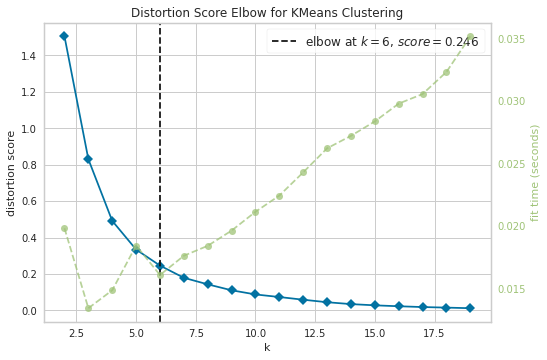

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#Visualizing the ELBOW method to get the optimal value of K 
kmodel=KMeans(random_state=0)
graph=KElbowVisualizer(kmodel,k=(2,20))
graph.fit(x)
graph.poof()

In [10]:
# Clustering
kmodel=KMeans(n_clusters=6,random_state=0)
kfit=kmodel.fit(x)
labels=kfit.labels_
result["Labels"]=labels

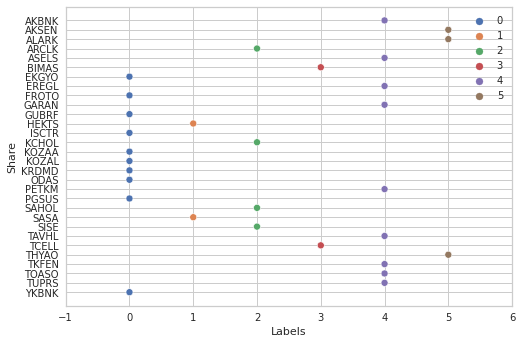

In [11]:
#Clusters interpretation
sns.scatterplot(x="Labels",y="Share",data=result,hue=labels,palette="deep")
plt.xlim(-1,6)
plt.show()

In [12]:
# Grouping shares
s_h=df[["Date","SASA","HEKTS"]]
pd.DataFrame(s_h)
print(s_h)

           Date    SASA  HEKTS
0    28-12-2020   7.218  1.756
1    29-12-2020   7.448  1.774
2    30-12-2020   7.418  1.939
3    31-12-2020   7.492  1.859
4    04-01-2021   7.655  1.868
..          ...     ...    ...
496  20-12-2022 118.400 39.480
497  21-12-2022 124.300 42.920
498  22-12-2022 125.000 43.960
499  23-12-2022 116.800 43.440
500  26-12-2022 111.000 41.260

[501 rows x 3 columns]


In [13]:
fig = px.line(s_h, x='Date', y=["HEKTS","SASA"],title="Past Price Movements of Hektas and SASA")
fig.show()

### Relationship Analysis
##### The investment company decided to establish a portfolio consisting of Hektaş and Sasa. We will perform the correlation test using the income and volatility data of these two stocks. First, we create our hypothesis tests and then we will examine whether it provides the linearity assumption.

In [14]:
s_h.corr()

,SASA,HEKTS
SASA,1.000,0.983
HEKTS,0.983,1.000


<AxesSubplot:>

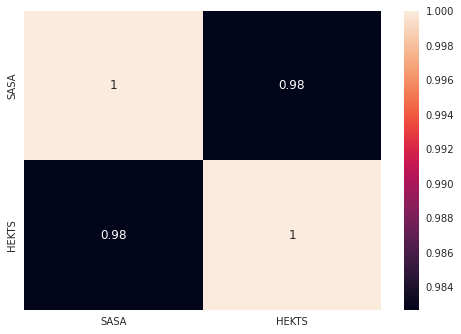

In [15]:
sns.heatmap(s_h.corr(),annot=True)

### Correlation Test(Spearman) 




#### Hypothesis testing
*  $ H0 $: correlation between two variables is not significant
*  $ H1 $: correlation between two variables is significant
##### 0.05 p value observations are significant


In [16]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198570 sha256=2731ab3e95d5615d349a49e4d29f1e65ec5ff75264f86fa50d162c04a5c030f8
  Stored in directory: /root/.cache/pip/wheels/31/83/a5/ab0b28732ee98b98146917fb56f7566807c1cc15a87dc8de62
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8a37168144aebbc009c8921cb427d577e31987de2317921f9ba9a6befd763006
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pingouin as pg
normality=pg.normality(s_h)
print(normality)

          W  pval  normal
SASA  0.708 0.000   False
HEKTS 0.669 0.000   False


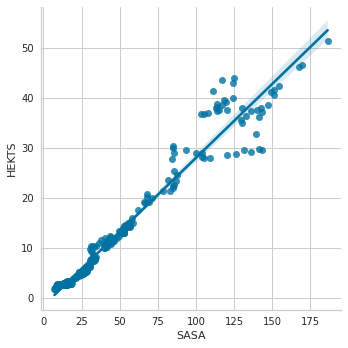

In [18]:
#LINEAR CORELATİON
#DATA IS IN A MONOTONIC-POSITIVE STRUCTURE.
sns.lmplot(x="SASA",y="HEKTS",data=s_h)
plt.show()

In [19]:
corelation=pg.corr(s_h["SASA"],s_h["HEKTS"],method="spearman")
print(corelation)

            n     r         CI95%  p-val  power
spearman  501 0.966  [0.96, 0.97]  0.000  1.000


##### When we look at the r value, there is a positive relationship between the two stocks. Our test is significant because the p-value is less than 0.05.

# Evaluation
#### We have obtained In line with the information, the investment company recommends that investors who do not like risk should keep Hektaş, which has high income and low volatility.For risk-loving investors, he advises keeping SASA and Hektaş shares in their portfolio together. When the index is a premium, both equities will provide good returns to investors. However, when the index falls, their portfolios will go negative because the correlation between the two stocks is high.# Evaluation